In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))


In [2]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt


In [12]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [4]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [5]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

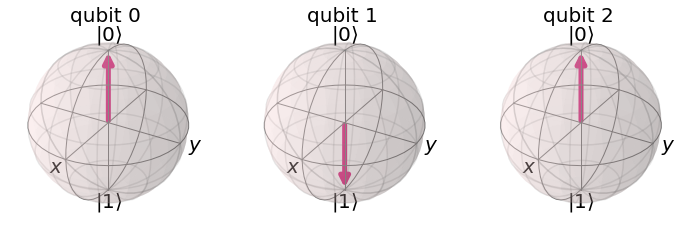

In [14]:
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState = stateGenerator('010')
circ.initialize(initializedState, qr)
getBloch(circ)

In [13]:
from qiskit import visualization


In [15]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [16]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

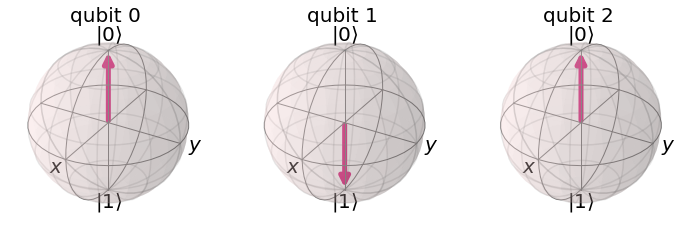

In [17]:
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState = stateGenerator('010')
circ.initialize(initializedState, qr)
getBloch(circ)

In [18]:
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)

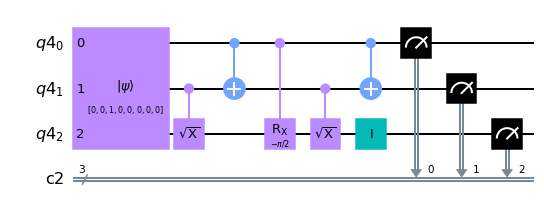

In [19]:
circ.draw('mpl')

['110']


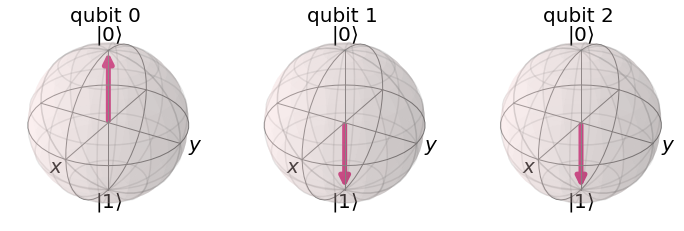

In [20]:
print(getMeasure(circ, 1))
getBloch(circ)

In [21]:
circ = QuantumCircuit(qr)
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)

In [22]:
qbsc = circ.to_gate(label=' QBSC')

In [23]:
circ2 = QuantumCircuit(7)
circ2.append(qbsc, [0, 1, 2])

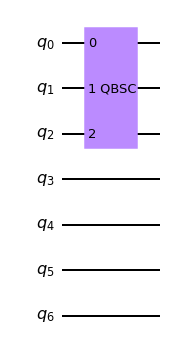

In [24]:
circ2.draw('mpl')

In [25]:
midcirc = QuantumCircuit(4)

#less than greater than
midcirc.cx(0, 2)
midcirc.crx(-pi/2, 2, 3)
midcirc.cx(1, 2)
midcirc.csx(1, 3)
midcirc.csx(2, 3)
midcirc.cx(3, 2)

#equal
midcirc.x(0)
midcirc.cx(0, 1)

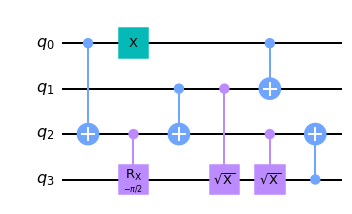

In [26]:
midcirc.draw('mpl')

In [27]:
mqc = midcirc.to_gate(label=' MQC')

In [28]:
circ2.append(mqc, [3, 4, 5, 6])

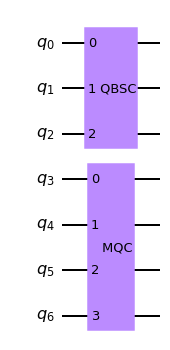

In [29]:
circ2.draw('mpl')

In [32]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [33]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [34]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

0010


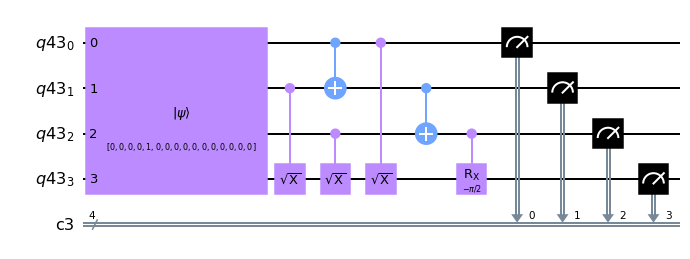

In [37]:
circ = makeCirc(4, 1)
#getBloch(circ)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)
    
circ.draw('mpl')

In [36]:
%matplotlib inline
from math import pi, sqrt
import random

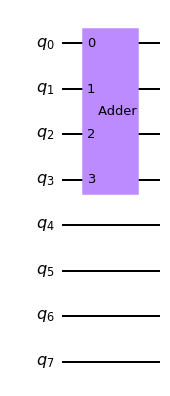

In [38]:
getMeasure(circ, 1)[0][::-1]
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

fullAdder = circ.to_gate(label=' Adder')
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

circ2.draw('mpl')

In [39]:
circ = QuantumCircuit(4)
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)

In [40]:
subber = circ.to_gate(label=' Subber')

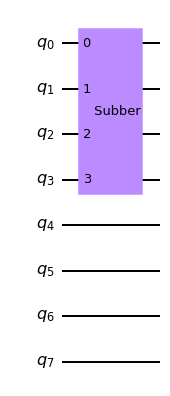

In [41]:
circ2 = QuantumCircuit(8)
circ2.append(subber, [0, 1, 2, 3])
circ2.draw('mpl')

In [42]:
circ = makeCirc(6, 0)
#getBloch(circ)

010010


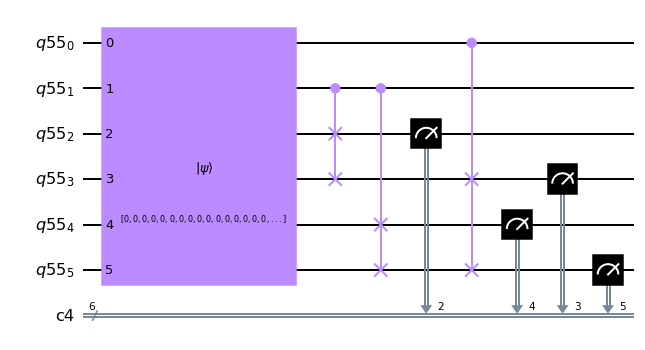

In [43]:
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

for i in range(2, 6):
    circ.measure(i, i)
circ.draw('mpl')

In [44]:
getMeasure(circ, 1)[0][::-1]
circ = QuantumCircuit(6)
circ.cswap(1, 2, 3)
circ.cswap(1, 4, 5)
circ.cswap(0, 3, 5)

In [45]:
mux = circ.to_gate(label=' Mux')

In [46]:
circ2 = QuantumCircuit(12)
circ2.append(mux, [0, 1, 2, 3, 4, 5])

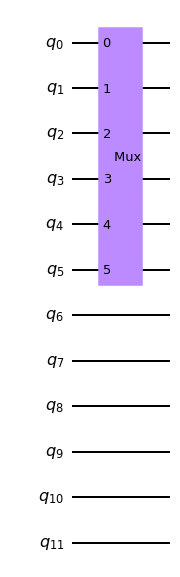

In [47]:
circ2.draw('mpl')

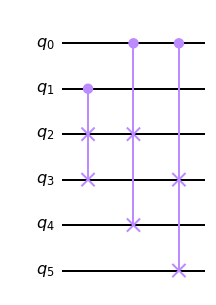

In [48]:
circ3 = QuantumCircuit(6)
circ3.cswap(1, 2, 3)
circ3.cswap(0, 2, 4)
circ3.cswap(0, 3, 5)
circ3.draw('mpl')

In [49]:
demux = circ3.to_gate(label=' Demux')

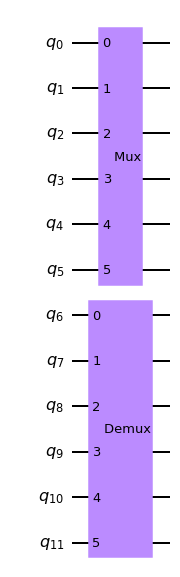

In [50]:
circ2.append(demux, [6, 7, 8, 9, 10, 11])
circ2.draw('mpl')

In [51]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [52]:
fullAdder = circ.to_gate(label=' Adder')

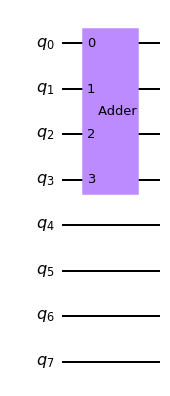

In [54]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])
circ2.draw('mpl')

In [55]:
def fourAdder(a1, a2):
    qubits = len(a1) + len(a2) + 5
    qr = QuantumRegister(qubits)
    qc = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '00000')
    circuit.initialize(initializedState, qr)
    
    circuit.append(fullAdder, [0, 4, 8, 9])
    circuit.append(fullAdder, [1, 5, 9, 10])
    circuit.append(fullAdder, [2, 6, 10, 11])
    circuit.append(fullAdder, [3, 7, 11, 12])
    
    for i in range(0, qubits):
        circuit.measure(i, i)
    return circuit

In [56]:
a = '1100'
b = '0011'
#'10001'

In [57]:
circ = fourAdder(a, b)
getMeasure(circ, 1)[0][:5]

'01111'

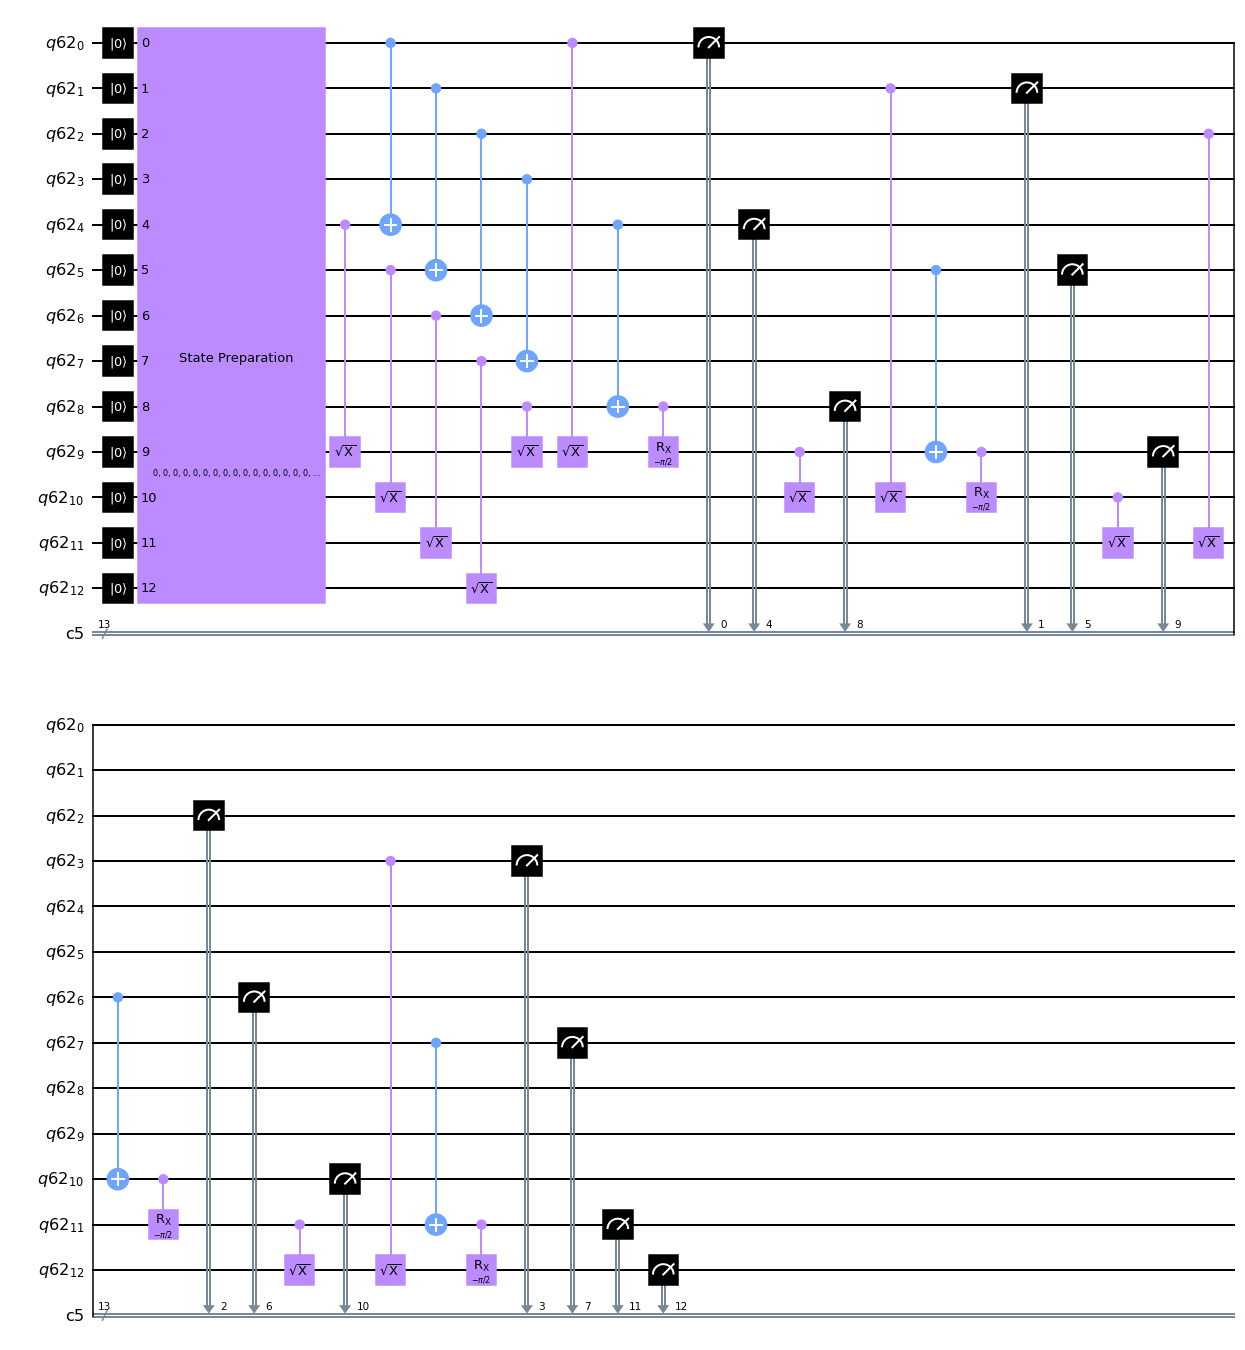

In [58]:
circ.decompose().draw('mpl')

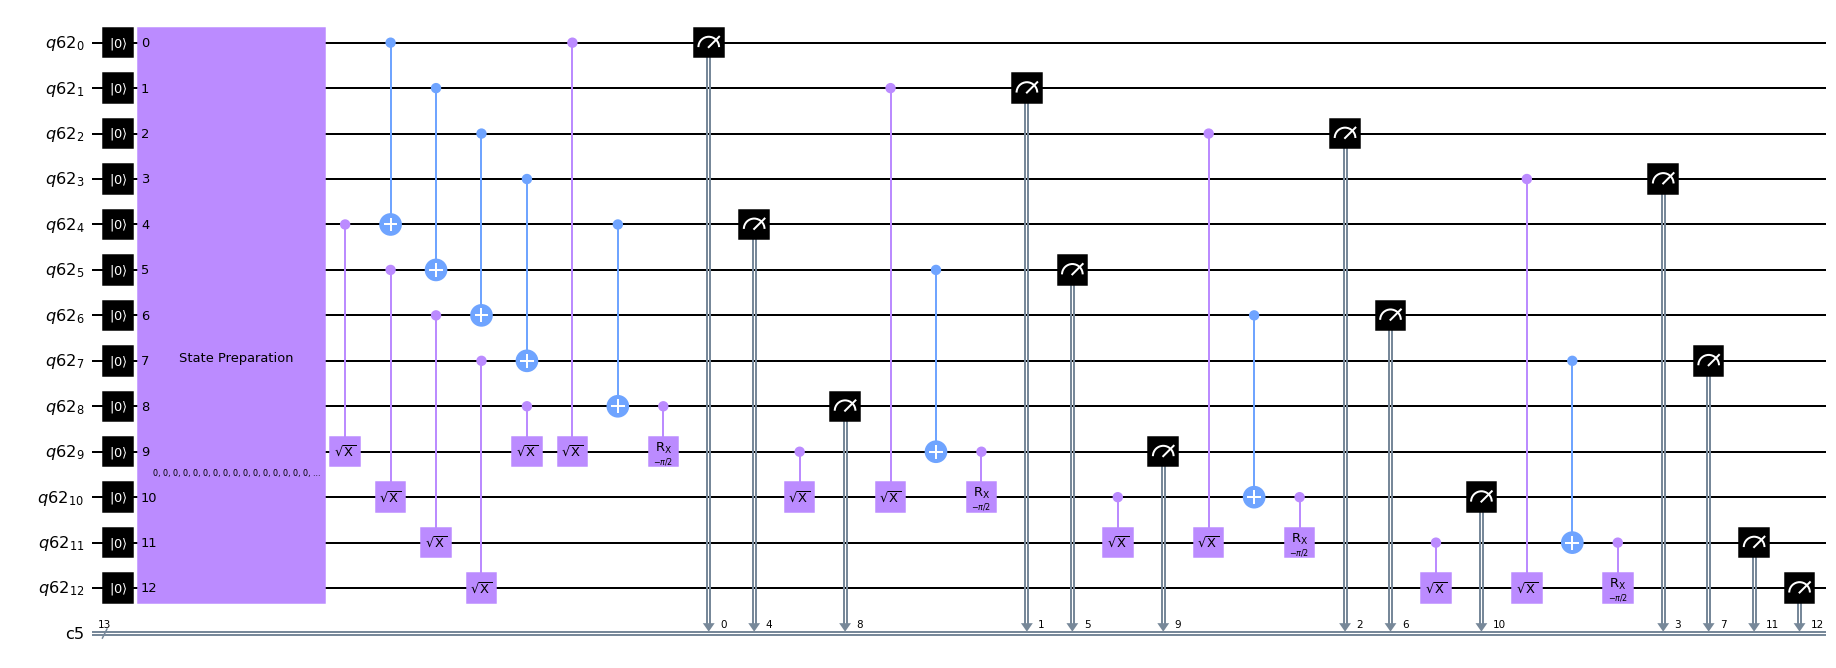

In [59]:
circ.decompose().draw('mpl', fold=-1)

In [60]:
def mult(a1, a2):
    qubits = len(a1) + len(a2) + 10
    qr = QuantumRegister(qubits)
    qc = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '0000000000')
    circuit.initialize(initializedState, qr)
    
    circuit.ccx(0, 2, 4)
    circuit.ccx(0, 3, 8)
    circuit.ccx(1, 2, 9)
    circuit.ccx(1, 3, 11)
    
    circuit.append(fullAdder, [4, 5, 6, 7])
    circuit.append(fullAdder, [8, 9, 7, 10])
    circuit.append(fullAdder, [11, 12, 10, 13])
    
    for i in range(6, qubits):
        circuit.measure(i, i)
    return circuit

In [61]:
a = '11'
b = '11'
#'10001'

In [62]:
circ = mult(a, b)

In [63]:
def getResult(circ):
    result = getMeasure(circ, 1)[0][::-1]
    newResult = result[13] + result[10] + result[7] + result[6]
    return newResult

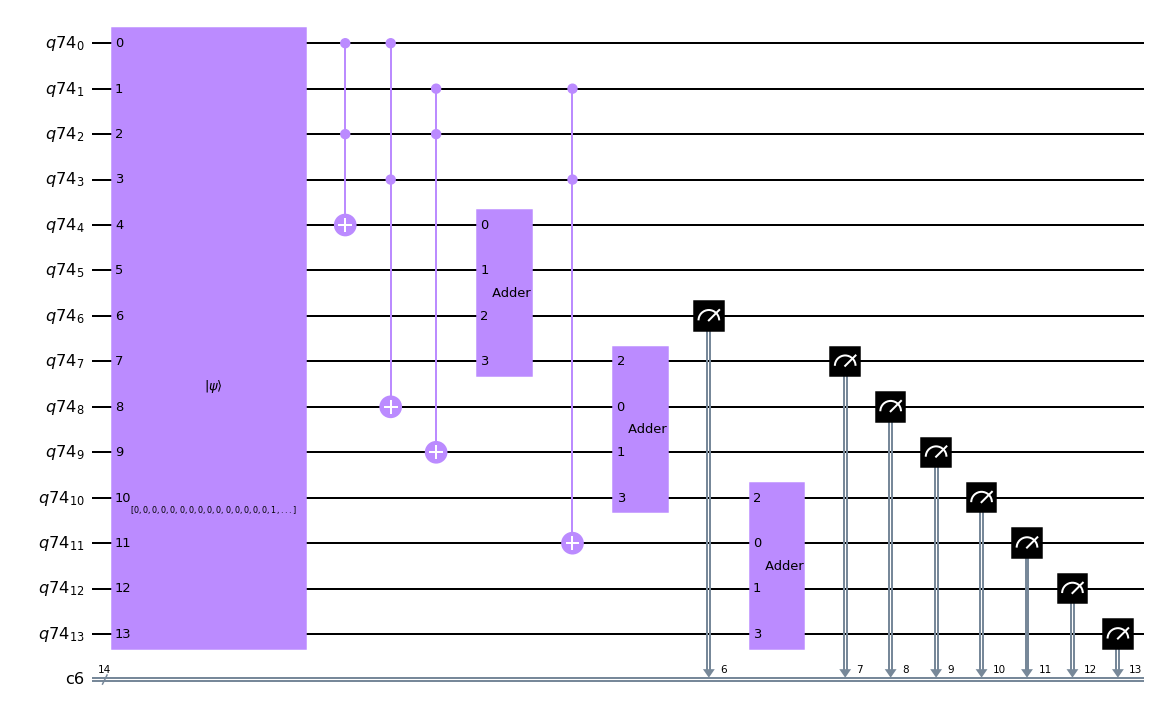

In [64]:
getResult(circ)
circ.draw('mpl')

In [67]:
def makeCirc2(n, m, o, inp):
    initState = inp
    for i in range(0, m):
        initState += str(0)
    for i in range(0, o):
        initState += str(1)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [68]:
encoderCirc = makeCirc2(6, 0, 2, '1000')
#getBloch(circ)

100011


In [69]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

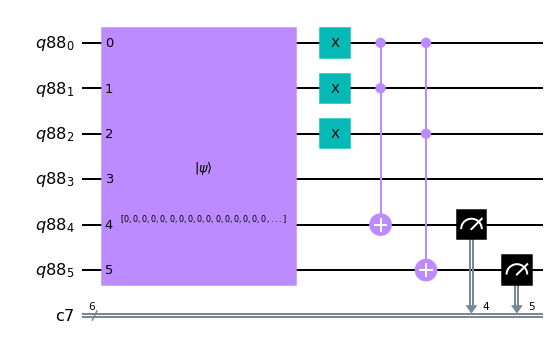

In [70]:
encoderCirc.draw('mpl')

In [71]:
getMeasure(encoderCirc, 1)[0][::-1][4:]

'11'

In [72]:
decoderCirc = makeCirc2(4, 1, 1, '10')

1001


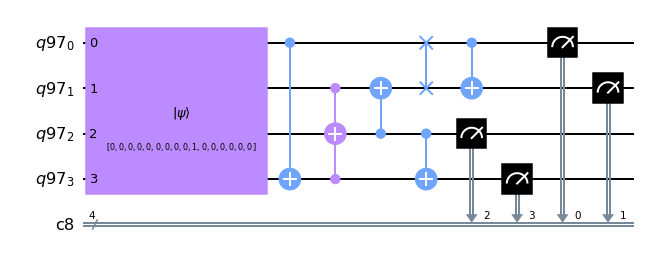

In [73]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0, 1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)
decoderCirc.draw('mpl')    


In [74]:
encCirc = QuantumCircuit(6)
encCirc.x(0)
encCirc.x(1)
encCirc.x(2)
encCirc.ccx(0, 1, 4)
encCirc.ccx(0, 2, 5)

In [75]:
Encoder = encCirc.to_gate(label = ' Encoder')

In [76]:
#decoder gate
decCirc = QuantumCircuit(4)
decCirc.cx(0, 3)
decCirc.ccx(1, 3, 2)
decCirc.cx(2, 1)
decCirc.cx(2, 3)
decCirc.swap(0, 1)
decCirc.cx(0, 1)

In [77]:
Decoder = decCirc.to_gate(label=' Decoder')


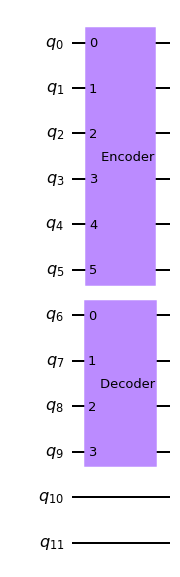

In [78]:
#circuit
circuit = QuantumCircuit(12)
circuit.append(Encoder, [0, 1, 2, 3, 4, 5])
circuit.append(Decoder, [6, 7, 8, 9])

circuit.draw('mpl')

In [79]:
def shifterCircuitMaker(n, inp=None):
    shifterCircuit = makeCirc3(n, 0, 1, inp)
    for i in range(0, n-2):
        shifterCircuit.cswap(0, i+1, i+2)
    for i in range(0, n-1):
        shifterCircuit.measure(i, i)
    return shifterCircuit

In [82]:
shiftCircuit = shifterCircuitMaker(12)

110000000111


In [81]:
def makeCirc3(n, m, o, inp=None):
    initState = ''
    for i in range(0, o):
        initState += str(1)
    if inp != None:
        initState = inp
    else:
        for i in range(0, n-o-m):
            initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [83]:
def applyShift(circ, n):
    result = getMeasure(circ, 1)[0][::-1]
    return shifterCircuitMaker(n, result)

In [84]:
for i in range(0, 10):
    shiftCircuit = applyShift(shiftCircuit, 12)

100000001110
100000011100
100000111000
100001110000
100011100000
100111000000
101110000000
111100000000
111000000000
110000000000


In [85]:
def rotateCircuitMaker(n, inp=None):
    shifterCircuit = makeCirc3(n, 0, 1, inp)
    for i in range(0, n-2):
        shifterCircuit.cswap(0, i+1, i+2)
    for i in range(0, n):
        shifterCircuit.measure(i, i)
    return shifterCircuit
def applyRotate(circ, n):
    result = getMeasure(circ, 1)[0][::-1]
    return rotateCircuitMaker(n, result)

In [86]:
rotateCircuit = rotateCircuitMaker(12)

101001101111


In [87]:
for i in range(0, 10):
    rotateCircuit = applyRotate(rotateCircuit, 12)

110011011110
100110111101
101101111010
111011110100
110111101001
101111010011
111110100110
111101001101
111010011011
110100110111


In [88]:
def makeCirc(n, state):
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(state)
    circ.initialize(initializedState, qr)
    return circ

In [89]:
def increment(n, currentState):
    circ = makeCirc(n, currentState)
    for i in range(n-1, 0, -1):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.x(n-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

In [90]:
n = 5
circ = increment(n, '0'*n)

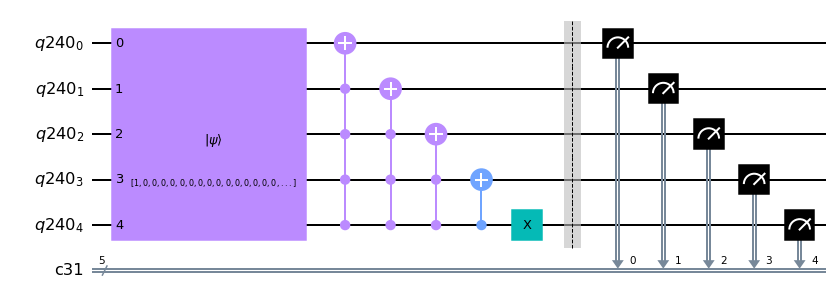

In [91]:
circ.draw('mpl')

In [92]:
def decrement(n, currentState):
    circ = makeCirc(n, currentState)
    circ.x(n-1)
    for i in range(1, n):
        circ.mct([j for j in range(n-i, n)], n-i-1)
    circ.barrier()
    circ.measure(range(n), range(n))
    return circ

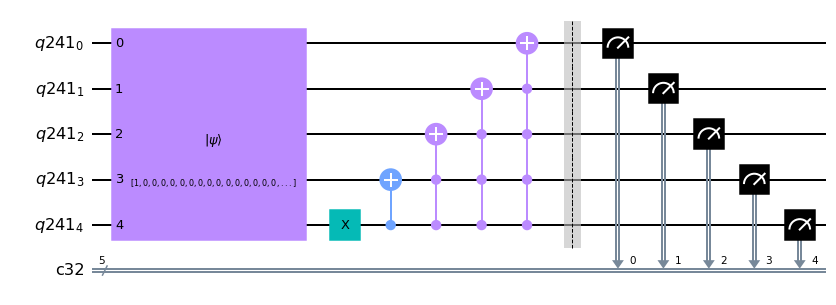

In [93]:
circ = decrement(n, '0'*n)

circ.draw('mpl', fold=-1)

In [94]:
n = 4
circ = increment(n, '0'*n)
print(getMeasure(circ, 1)[0][::-1])
for i in range(0, 17):
    circ = increment(n, getMeasure(circ, 1)[0][::-1])
    print(getMeasure(circ, 1)[0][::-1])

0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
0000
0001
0010


In [95]:
def makeALUCirc(n, op, inp):
    initState = op + inp
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [96]:
opLUT = {'+': '11000',
          '-': '11100',
          'xor': '10000',
         'xnor': '10100',
         'nop': '00000',
         '+1': '11010',
         '-1': '11111',
         'neg': '00100',
        }
#Look Up Table - FPGA, Dictionary in Python

In [97]:
def performOp(inp1, inp2, op):
    circuit = makeALUCirc(7, opLUT[op], str(inp1) + str(inp2))
    circuit.csx(0, 6)
    circuit.csx(5, 6)
    circuit.cx(0, 5)
    circuit.crx(-pi/2, 5, 6)
    circuit.cx(0, 5)
    circuit.csx(1, 6)
    circuit.csx(3, 6)
    circuit.cx(1, 3)
    circuit.crx(-pi/2, 3, 6)
    circuit.cx(2, 6)
    circuit.cx(4, 6)
    circuit.measure(6, 6)
    return getMeasure(circuit, 1)[0][0]

In [98]:
performOp(1, 0, 'nop')

0000010


'0'

In [99]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [100]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

1000


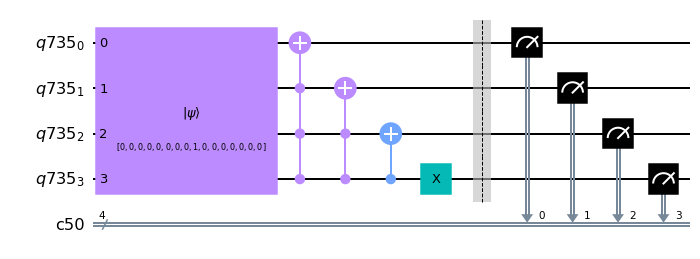

In [101]:
# Let's see how it looks:
qc = makeCirc(4, 0)
qft(qc,4)
qc.draw('mpl')
circ.draw('mpl')

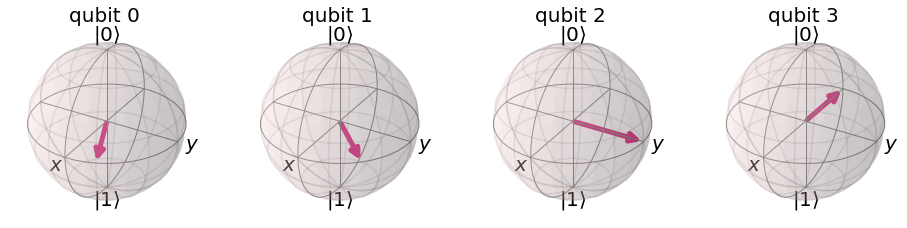

In [102]:
#QFT(ABCD) -> DCBA (swap) ABCD
getBloch(qc)